In [32]:
import numpy as np
import matplotlib.pyplot as pl

fig_size = pl.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 10
fig_size[1] = 6
pl.rcParams["figure.figsize"] = fig_size

[10.0, 6.0]


In [34]:
height, width = input("Enter number: ").split()

# Alinan degerleri str'den int'e donusturme 
height = int(height)
width = int(width)

Enter number: 49 49


In [115]:
# Sabitlerin belirlenmesi
teta = -np.pi/4
sigma = 1 #1
lamda = 2*np.pi*sigma
gamma = 0.25 #0.25
s = 1 # 1

gabor_mask = np.zeros((height, width))

In [116]:
def gobor_mask_computation(teta, sigma, lamda, gamma, s):
    """Olusturulacak olan maskenin, x ve y koordinatlarinda
        gezinmek icin ic ice donguler..."""

    
    height_left = -int(height/2)
    height_right = (int(height/2)+1)
    width_left = -int(width/2)
    width_right = (int(width/2)+1)
    
    # Farkli mask buyuklugu ayarlama
    # gabor_mas[i][j] out of range olmamasi icin 
    if height % 2 == 0:
        height_right = int(height/2)
    if width % 2 == 0:
         width_right = int(width/2)
    
    counter = 0
    toplam_deger = 0
    i = -1  
    for x in range(height_left, height_right):
        i +=1
        j = -1
        for y in range(width_left, width_right):
            j +=1

            # x ve y ustu(dondurme) hesaplanmasi
            _x = x*np.cos(teta) + y*np.sin(teta)
            _y = -(x*np.sin(teta)) + y*np.cos(teta)

            #gabor chekirdek fonksiyonu
            gabor_func = np.exp(-(((_x**2) + (gamma**2)*(_y**2))/2*(sigma**2)*(s**2))) * \
                    np.cos(2*np.pi * _x/lamda*(s**2))

            #print(gabor_func)
            gabor_mask[i][j] = gabor_func

            toplam_deger += gabor_func
            counter +=1
    
    return gabor_mask

    print("Toplam deger: ",toplam_deger)
    print(gabor_mask.sum())

    print(toplam_deger/counter)
    #ortalama_deger = gabor_mask.mean()
    #print(ortalama_deger)
    print(counter)


gabor_mask = gobor_mask_computation(teta, sigma, lamda, gamma, s)

In [117]:
# Eger maskin toplam degeri 0'a esit degilse 

def normalize_etmek(gabor_mask):
    counter = 0
    toplam_deger = 0.0
    ortalama_deger = gabor_mask.mean()
    for x in range(height):
        for y in range(width):
            gabor_mask[x][y] = gabor_mask[x][y] - ortalama_deger
            toplam_deger += gabor_mask[x][y] 
            counter +=1
    return gabor_mask

    print(ortalama_deger)
    print(gabor_mask.mean())
    print(gabor_mask.sum())
    print(toplam_deger)
    print(counter)

[[ 2.31952283e-016  6.05946449e-016  2.51079948e-016 ...  7.55513280e-231
  -3.49033995e-241 -5.72864413e-251]
 [ 6.05946449e-016  4.37661850e-015  1.07406578e-014 ...  1.24510232e-220
   8.04239701e-231 -3.49033995e-241]
 [ 2.51079948e-016  1.07406578e-014  7.28772410e-014 ...  6.04214248e-211
   1.24510232e-220  7.55513280e-231]
 ...
 [ 7.55513280e-231  1.24510232e-220  6.04214248e-211 ...  7.28772410e-014
   1.07406578e-014  2.51079948e-016]
 [-3.49033995e-241  8.04239701e-231  1.24510232e-220 ...  1.07406578e-014
   4.37661850e-015  6.05946449e-016]
 [-5.72864413e-251 -3.49033995e-241  7.55513280e-231 ...  2.51079948e-016
   6.05946449e-016  2.31952283e-016]]
15.24377811784223


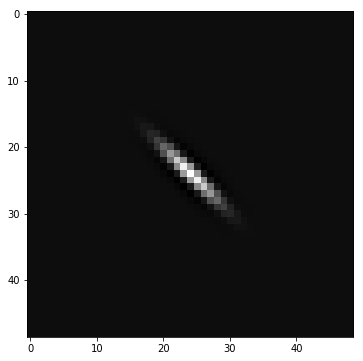

In [118]:
from skimage import color
print(gabor_mask)
print(gabor_mask.sum())
#print(gabor_func)
#print("\n Toplam deger : ", toplam_deger)
pl.imshow(gabor_mask, cmap='gray')

# Dosyaya yazma islemi...
file = open("gabor_mask.txt", mode = "w", encoding="utf-8")

file.write("[ ")
for x in  range(height):    
    file.write("\n\n")
    file.write("[")
    for y in range(width):
        file.write(str(gabor_mask[x][y]))
        file.write(",")
    file.write("]")
file.write(" ]")

file.close()

In [119]:
def tersini_almak(image):
     # image'in degerlerini tersine ceviriyoruz
    inverse_of_image = np.zeros((image.shape[0],image.shape[1]))    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            inverse_of_image[x][y] = 1 - image[x][y]
    return inverse_of_image
    


def maske_gezdirme(image, mask):
    """Verilen resme, maskeyi uygular"""
    
    # image'in degerlerini tersine ceviriyoruz
#     for x in range(image.shape[0]):
#         for y in range(image.shape[1]):
#             image[x][y] = 1 - image[x][y]
    
    output = np.zeros((image.shape[0], image.shape[1]))
    
    output = scipy.signal.convolve2d(image, mask, 'same')
    
    #image_padded = np.zeros(((image.shape[0] + 48), (image.shape[1] + 48)))
     #print(image_padded.shape)
    #image_padded[24:-24, 24:-24] = image
    
    #for x in range(image.shape[0]):
    #    for y in range(image.shape[1]):
            #output[x][y] = (mask * image_padded[x:x+49, y:y+49]).sum()            
    #        output[x][y] = np.abs((mask * image_padded[x:x+49, y:y+49]).sum())
            
    return output

#######################################################################################
import scipy.signal

gabor_mask = normalize_etmek(gabor_mask)

#image_inverse = tersini_almak(image)

new_image = maske_gezdirme(image, gabor_mask)
print(image.shape[0], image.shape[1])
pl.imshow(image, cmap='gray')


605 700


(605, 700)


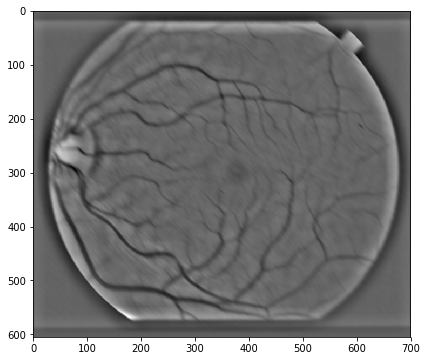

In [120]:
pl.imshow(new_image, cmap="gray")
print(new_image.shape)


In [121]:
# """Maskenin x ve y koordinatlarin (0,0) noktasi
#     en bastan basliyor..."""
# i = -1
# toplam_deger = 0
# for x in range(height):
#     i +=1
#     j = -1
#     for y in range(width):
#         j +=1
        
#         _x = x*np.cos(teta) + y*np.sin(teta)
#         _y = -(x*np.sin(teta)) + y*np.cos(teta)
        
#         #gabor fonksiyonu
#         gabor_func = np.exp(-(((_x**2) + (gamma**2)*(_y**2))/2*(sigma**2)*(s**2))) * \
#                 np.cos(2*np.pi * _x/lamda*(s**2))
        
#         #print(gabor_func)
#         gabor_mask[x][y] = gabor_func
        
#         toplam_deger += gabor_func
        

In [122]:
# print(gabor_mask)
# print(gabor_func)
# pl.imshow(gabor_mask)

# print(toplam_deger)

In [123]:

# temp_image = np.zeros((image.shape[0],image.shape[1]))
# result_image = np.zeros((image.shape[0], image.shape[1]))

# image_inverse = tersini_almak(image)


In [124]:
def farkli_acilar_icin_kenar_bulmak(image):
    
    temp_image = np.zeros((image.shape[0],image.shape[1]))
    result_image = np.zeros((image.shape[0], image.shape[1]))

    image_inverse = tersini_almak(image)

    # 15, 30, 45, 60, 75, 90 dereceler
    for i in [12, 6, 4, 3, 2.4, 2]:
        print(i)
        gabor_mask_of_many_degrees = gobor_mask_computation(-np.pi/i, sigma, lamda, gamma, s)
        gabor_mask_of_many_degrees = normalize_etmek(gabor_mask_of_many_degrees)
        temp_image = maske_gezdirme(image_inverse, gabor_mask_of_many_degrees)


        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                if(temp_image[x][y] > result_image[x][y]):
                    result_image[x][y] = temp_image[x][y]
    
    return result_image

result_image = farkli_acilar_icin_kenar_bulmak(image)


12
6
4
3
2.4
2


In [125]:
pl.imshow(result_image, cmap='gray')

In [126]:
#pl.imshow(gabor_mask_of_many_degrees, cmap='gray')

In [127]:
#pl.imshow(temp_image, cmap='gray')

In [128]:
#

from skimage.morphology import  white_tophat, black_tophat
from skimage.morphology import disk

selem = disk(4)

def tophat_uygulamak(result_image, selem):
    
    

    w_tophat = white_tophat(result_image, selem)

    print(selem.shape)
    
    return w_tophat

w_tophat = tophat_uygulamak(result_image, selem)

(9, 9)


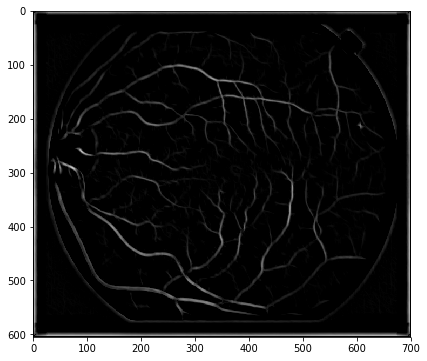

In [129]:
pl.imshow(w_tophat, cmap='gray')

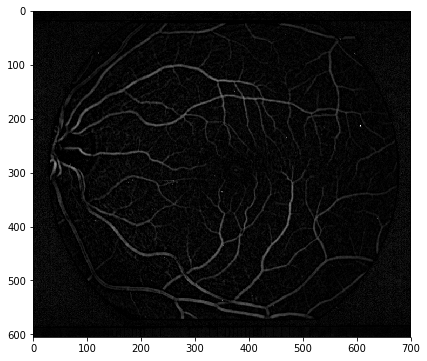

In [130]:
b_tophat = black_tophat(image, selem)

pl.imshow(b_tophat, cmap='gray')

In [131]:
def feature_cikartma(image_gray):

    feature1 = np.zeros((image_gray.shape[0], image_gray.shape[1]))
    feature2 = np.zeros((image_gray.shape[0], image_gray.shape[1]))
    feature3 = np.zeros((image_gray.shape[0], image_gray.shape[1]))
    feature4 = np.zeros((image_gray.shape[0], image_gray.shape[1]))
    feature5 = np.zeros((image_gray.shape[0], image_gray.shape[1]))
    
    height, width = image_gray.shape
    matrix_9x9 = np.zeros((9, 9))
    
    for row in range(4,height-4):
        for column in range(4,width-4):
            #print(image_gray[i][j])

            
            #print(matrix_9x9)
            k = -1
            for i in range(row-4, row+5):
                k+=1
                s = -1
                for j in range(column-4, column+5):
                    s+=1 
                    matrix_9x9[k][s] = image_gray[i][j]

            #feature cikartma
            feature1[row][column] = image_gray[row][column] - matrix_9x9.min()
            feature2[row][column] = matrix_9x9.max() - image_gray[row][column]
            # np.abs ve np.absolute() ikiside aynidir...
            feature3[row][column] = np.abs(image_gray[row][column] - matrix_9x9.mean())
            feature4[row][column] = np.std(matrix_9x9)
            feature5[row][column] = image_gray[row][column]

    return [feature1, feature2, feature3, feature4, feature5]

In [132]:
feature_list = feature_cikartma(w_tophat)

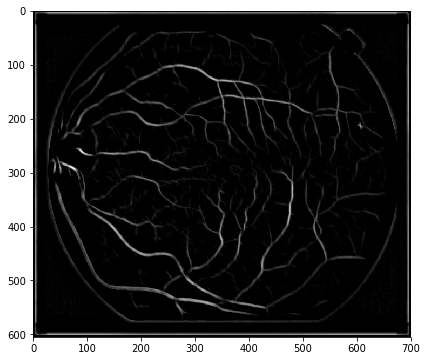

In [134]:
##print(feature_list[0][604][700])
pl.imshow(feature_list[0],cmap="gray")





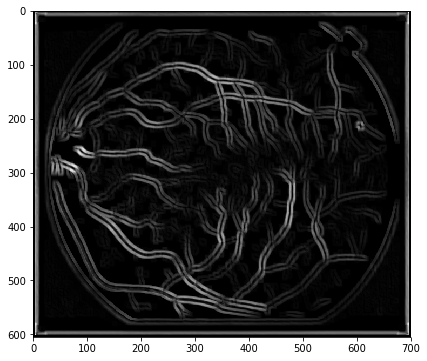

In [135]:
pl.imshow(feature_list[1],cmap="gray")


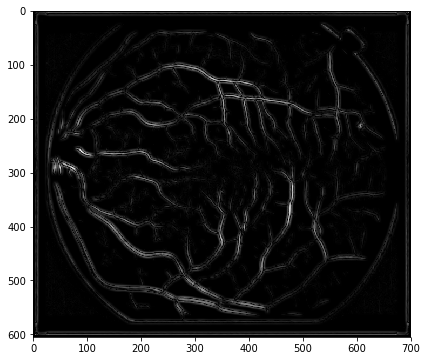

In [136]:
pl.imshow(feature_list[2],cmap="gray")


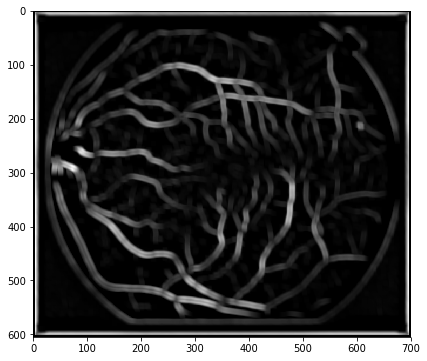

In [138]:
pl.imshow(feature_list[3],cmap="gray")


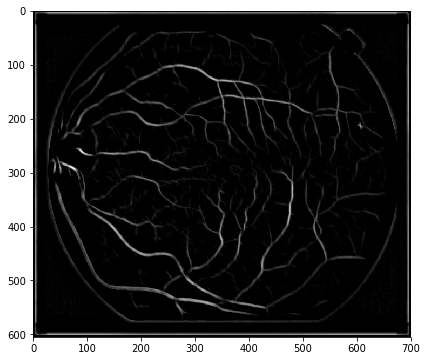

In [137]:
pl.imshow(feature_list[4],cmap="gray")


In [31]:
feature_matrix = np.zeros((w_tophat.shape[0]*w_tophat.shape[1], 5))
for i in range(5):
    j = 0
    for column in range(w_tophat.shape[1]):
        for row in range(w_tophat.shape[0]):
            feature_matrix[j][i] = feature_list[i][row][column]
            j += 1

In [32]:
label_matrix = np.zeros(w_tophat.shape[0]*w_tophat.shape[1])

label_image = io.imread("../Retinal Fundus Image/labels-ah/im0077.ah.ppm", as_gray=True)

#np.array_equal(feature_matrix)

(605, 700)


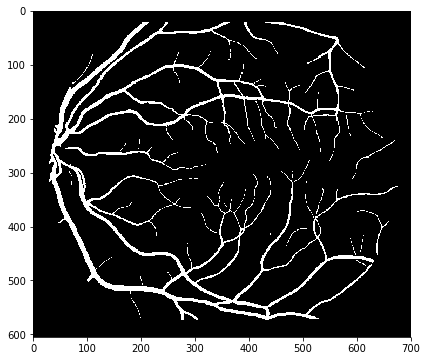

In [33]:
pl.imshow(label_image,cmap='gray')
print(label_image.shape)

In [34]:
i = 0
for column in range(label_image.shape[1]):
    for row in range(label_image.shape[0]):        
        label_matrix[i] = label_image[row][column] 
        i += 1

In [35]:
print(label_matrix[15609])
print(i, 605*700)
# j = 0
# while 1:
#     print(feature_matrix[j])
#     j += 1

0.0
423500 423500


In [36]:
#pl.imshow(label_matrix)

In [37]:
X = feature_matrix
y = np.int_(label_matrix)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# j = 0
# while 1:
#     print(X_test[j]," ", y_test[j])
#     j += 1

(317625, 5)
(105875, 5)
(317625,)
(105875,)


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,100))

In [43]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [44]:
prediction = mlp_model.predict(X_test)

print(prediction.shape)
print(X_test[100])

(105875,)
[-0.36327893 -0.49512737 -0.50112233 -0.54258372 -0.36327893]


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(prediction, y_test))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97     99828
        255       0.56      0.77      0.65      6047

avg / total       0.96      0.95      0.96    105875



In [46]:
confusion_matrix(prediction, y_test)

array([[96109,  3719],
       [ 1363,  4684]])

In [47]:
# i = 0
# while 1:
#     print(y_test[i],' ', prediction[i])
#     i += 1

In [48]:
set(y_test) - set(prediction)

set()

In [49]:
predicted_image = np.zeros((605, int(prediction.shape[0]/605)))
index_counter = 0
for column in range(int(prediction.shape[0]/605)):
    for row in range(605):
        predicted_image[row][column] = prediction[index_counter]
        index_counter += 1

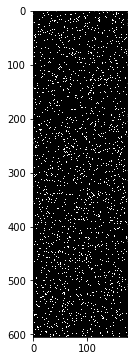

In [50]:
pl.imshow(predicted_image, cmap='gray')

In [51]:
# Ornek verinin yuklenmesi
test_image = io.imread('../Retinal Fundus Image/stare-images/im0081.ppm', as_gray=True)

#result_image = farkli_acilar_icin_kenar_bulmak(test_image)

#w_tophat = tophat_uygulamak(result_image, selem)
w_tophat = test_image


(605, 700)


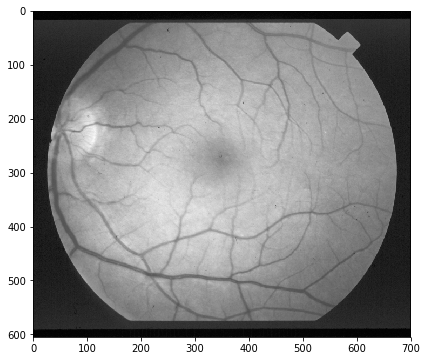

In [52]:
print(w_tophat.shape)
pl.imshow(w_tophat, cmap='gray')


In [53]:
feature_list = feature_cikartma(w_tophat)

In [54]:
feature_matrix = np.zeros((w_tophat.shape[0]*w_tophat.shape[1], 5))
for i in range(5):
    j = 0
    for column in range(w_tophat.shape[1]):
        for row in range(w_tophat.shape[0]):
            feature_matrix[j][i] = feature_list[i][row][column]
            j += 1

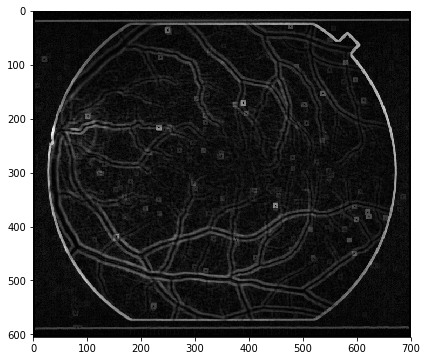

In [56]:
pl.imshow(feature_list[0], cmap='gray')

In [57]:
label_matrix = np.zeros(w_tophat.shape[0]*w_tophat.shape[1])

label_image = io.imread("../Retinal Fundus Image/labels-ah/im0081.ah.ppm", as_gray=True)

(605, 700)


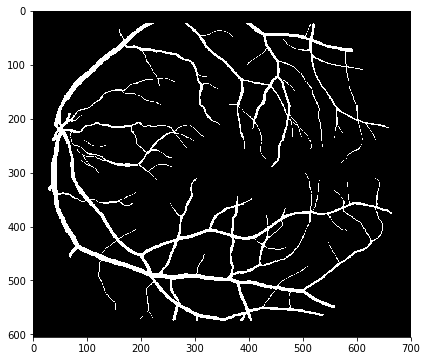

In [58]:
pl.imshow(label_image,cmap='gray')
print(label_image.shape)

In [59]:
i = 0
for column in range(label_image.shape[1]):
    for row in range(label_image.shape[0]):        
        label_matrix[i] = label_image[row][column] 
        i += 1

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(feature_matrix)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
feature_matrix = scaler.transform(feature_matrix)
#X_test = scaler.transform(X_test)

In [62]:
prediction = mlp_model.predict(feature_matrix)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(prediction, label_matrix))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85    335826
        255       0.14      0.05      0.07     87674

avg / total       0.65      0.74      0.69    423500



In [82]:
a = confusion_matrix(prediction, label_matrix)
arr = a[1][1]/a[1][0]*100
print(a)
print(arr)

[[308508  27318]
 [ 83377   4297]]
5.153699461482184


In [65]:
predicted_image = np.zeros((605, int(prediction.shape[0]/605)))
index_counter = 0
for column in range(int(prediction.shape[0]/605)):
    for row in range(605):
        predicted_image[row][column] = prediction[index_counter]
        index_counter += 1

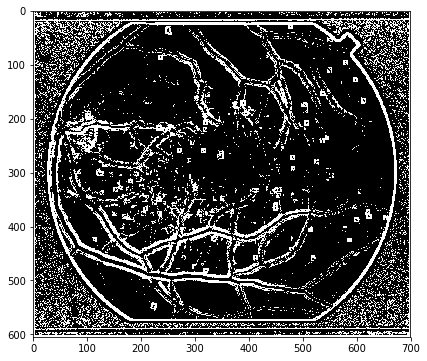

In [66]:
pl.imshow(predicted_image, cmap='gray')

In [123]:
# i = 0
# while 1:
#     print(label_matrix[i],' ', prediction[i])
#     i += 1

In [124]:
#######################################################
feature_folder = io.ImageCollection('../Retinal Fundus Image/feature_folder/*.*')
label_folder = io.ImageCollection('../Retinal Fundus Image/label_folder/*.*')

In [125]:
number_of_image = len(feature_folder)
print(len(label_folder))
print(feature_folder[0].shape)
print(label_folder[0].shape)

30
(584, 565, 3)
(584, 565)


/home/kdervisov/yaz_donemi_calismalarim/venv_internship/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [126]:
"""
    -Toplam resmin boyutunu hesaplaniyor.
    -
"""
#print(feature_folder[45].shape)


height_manual = 0
width_manual = 0
common_image_size = 0
common_manual_image_size = 0

for count in range(number_of_image):
    height1, width1, depth = feature_folder[count].shape
    common_image_size += height1*width1
    
    height_manual, width_manual = label_folder[count].shape
    common_manual_image_size += height_manual*width_manual 
    
    if (height1 != height_manual) | (width1 != width_manual):
        print(count, "Resimler uyusmuyor")

/home/kdervisov/yaz_donemi_calismalarim/venv_internship/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [127]:
print(common_image_size)
print(common_manual_image_size)

10834200
10834200


In [128]:
from skimage.color import rgb2gray

folder_image_matrix = np.zeros((common_image_size, 5))

temp_value = 0
for index_of_image in range(number_of_image):
    print(index_of_image, "'ci Resim")
#     height, width, depth = feature_folder[count].shape
#     common_image_size += height*width
    
    gray_image = rgb2gray(feature_folder[index_of_image])
    result_image = farkli_acilar_icin_kenar_bulmak(gray_image)
    w_tophat = tophat_uygulamak(result_image, selem)
    
    feature_list = feature_cikartma(w_tophat)
    
    for i in range(5):
        j = temp_value
        for column in range(w_tophat.shape[1]):
            for row in range(w_tophat.shape[0]):
                folder_image_matrix[j][i] = feature_list[i][row][column]
                j += 1
    temp_value = j
    

0 'ci Resim


/home/kdervisov/yaz_donemi_calismalarim/venv_internship/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


12
6
4
3
2.4
2
(9, 9)
1 'ci Resim
12
6
4
3
2.4
2
(9, 9)
2 'ci Resim
12
6
4
3
2.4
2
(9, 9)
3 'ci Resim
12
6
4
3
2.4
2
(9, 9)
4 'ci Resim
12
6
4
3
2.4
2
(9, 9)
5 'ci Resim
12
6
4
3
2.4
2
(9, 9)
6 'ci Resim
12
6
4
3
2.4
2
(9, 9)
7 'ci Resim
12
6
4
3
2.4
2
(9, 9)
8 'ci Resim
12
6
4
3
2.4
2
(9, 9)
9 'ci Resim
12
6
4
3
2.4
2
(9, 9)
10 'ci Resim
12
6
4
3
2.4
2
(9, 9)
11 'ci Resim
12
6
4
3
2.4
2
(9, 9)
12 'ci Resim
12
6
4
3
2.4
2
(9, 9)
13 'ci Resim
12
6
4
3
2.4
2
(9, 9)
14 'ci Resim
12
6
4
3
2.4
2
(9, 9)
15 'ci Resim
12
6
4
3
2.4
2
(9, 9)
16 'ci Resim
12
6
4
3
2.4
2
(9, 9)
17 'ci Resim
12
6
4
3
2.4
2
(9, 9)
18 'ci Resim
12
6
4
3
2.4
2
(9, 9)
19 'ci Resim
12
6
4
3
2.4
2
(9, 9)
20 'ci Resim
12
6
4
3
2.4
2
(9, 9)
21 'ci Resim
12
6
4
3
2.4
2
(9, 9)
22 'ci Resim
12
6
4
3
2.4
2
(9, 9)
23 'ci Resim
12
6
4
3
2.4
2
(9, 9)
24 'ci Resim
12
6
4
3
2.4
2
(9, 9)
25 'ci Resim
12
6
4
3
2.4
2
(9, 9)
26 'ci Resim
12
6
4
3
2.4
2
(9, 9)
27 'ci Resim
12
6
4
3
2.4
2
(9, 9)
28 'ci Resim
12
6
4
3
2.4
2
(9, 9)
29 'ci 

In [129]:
print(label_folder[0].shape)

(584, 565)


In [130]:
label_folder_matrix = np.zeros(common_manual_image_size)

i = 0
for index_of_image in range(number_of_image):
    print(index_of_image, "'ci Resim")
    for column in range(label_folder[index_of_image].shape[1]):
        for row in range(label_folder[index_of_image].shape[0]):        
            label_folder_matrix[i] = label_folder[index_of_image][row][column] 
            i += 1


0 'ci Resim
1 'ci Resim
2 'ci Resim
3 'ci Resim
4 'ci Resim
5 'ci Resim
6 'ci Resim
7 'ci Resim
8 'ci Resim
9 'ci Resim
10 'ci Resim
11 'ci Resim
12 'ci Resim
13 'ci Resim
14 'ci Resim
15 'ci Resim
16 'ci Resim
17 'ci Resim
18 'ci Resim
19 'ci Resim
20 'ci Resim
21 'ci Resim
22 'ci Resim
23 'ci Resim
24 'ci Resim
25 'ci Resim
26 'ci Resim
27 'ci Resim
28 'ci Resim
29 'ci Resim


In [131]:


X = feature_matrix
y = np.int_(label_matrix)

#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# j = 0
# while 1:
#     print(X_test[j]," ", y_test[j])
#     j += 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,100))

mlp_model.fit(X_train, y_train)

prediction = mlp_model.predict(X_test)

print(prediction.shape)
print(X_test[100])

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(prediction, y_test))

confusion_matrix(prediction, y_test)

(317625, 5)
(105875, 5)
(317625,)
(105875,)
(105875,)
[-0.36145038 -0.51726922 -0.48400154 -0.52541981 -0.36145038]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98    100143
        255       0.59      0.80      0.68      5732

avg / total       0.97      0.96      0.96    105875



array([[96974,  3169],
       [ 1126,  4606]])

In [69]:
import pickle

filename = 'finalized_model.sav'

In [44]:
# modeli seriallestirip kaydetmek
 


pickle.dump(mlp_model, open(filename, 'wb'))


In [71]:
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [83]:
feature_folder_test = io.ImageCollection('../Retinal Fundus Image/folder_feature_test/*.*')
label_folder_test = io.ImageCollection('../Retinal Fundus Image/folder_label_test/*.*')

In [86]:
number_of_image = len(feature_folder_test)

In [ ]:
from skimage.color import rgb2gray



#temp_value = 0
for index_of_image in range(number_of_image):
    print(index_of_image+1, "'ci Resim")
#     height, width, depth = feature_folder[count].shape
#     common_image_size += height*width

    folder_test_image_matrix = np.zeros((feature_folder_test[index_of_image].shape[0]*\
                                         feature_folder_test[index_of_image].shape[1], 5))
    
    gray_image = rgb2gray(feature_folder_test[index_of_image])
    result_image = farkli_acilar_icin_kenar_bulmak(gray_image)
    w_tophat = tophat_uygulamak(result_image, selem)
    
    feature_list = feature_cikartma(w_tophat)
    
    for i in range(5):
        j = 0
        for column in range(w_tophat.shape[1]):
            for row in range(w_tophat.shape[0]):
                folder_test_image_matrix[j][i] = feature_list[i][row][column]
                j += 1
    
    folder_test_label_matrix = np.zeros(label_folder_test[index_of_image].shape[0]*label_folder_test[index_of_image].shape[1])

    i = 0
    
    print(index_of_image+1, "'ci Manual Resim")
    for column in range(label_folder_test[index_of_image].shape[1]):
        for row in range(label_folder_test[index_of_image].shape[0]):        
            folder_test_label_matrix[i] = label_folder_test[index_of_image][row][column] 
            i += 1

    
    scaler = StandardScaler()
    scaler.fit(folder_test_image_matrix)
    folder_test_image_matrix = scaler.transform(folder_test_image_matrix)
    #X_test = scaler.transform(X_test)
    predicts = loaded_model.predict(folder_test_image_matrix)
    
    print(classification_report(predicts, folder_test_label_matrix))
    
    predicted_image = np.zeros((label_folder_test[index_of_image].shape[1], int(prediction.shape[0] / \
                                                                                label_folder_test[index_of_image].shape[1])))
    index_counter = 0
    for column in range(int(prediction.shape[0]/label_folder_test[index_of_image].shape[1])):
        for row in range(label_folder_test[index_of_image].shape[1]):
            predicted_image[row][column] = prediction[index_counter]
            index_counter += 1
    
    pl.imshow(predicted_image, cmap='gray')
#     arr = confusion_matrix(predicts, folder_test_label_matrix)
#     statis = arr[1][1]/a[1][0]*100
#     print("\n")
#     print(statis)

1 'ci Resim
12
6
4
3
2.4
2
(9, 9)
1 'ci Manual Resim
             precision    recall  f1-score   support

          0       0.98      0.93      0.96    315035
        255       0.31      0.60      0.41     14925

avg / total       0.95      0.92      0.93    329960

2 'ci Resim
12
6
4
3
2.4
2
(9, 9)



KeyboardInterrupt

